In [1]:
from pipeline import pipeline
from chris import ldData
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
from heinrich import inv, show_heartbeat, crop

hyper = { 
    
    "inv_threshold": 0.6, 
    "crop_location": 300 
}

data = pipeline([ ldData, crop, inv ], hyper )

X_train, X_test, y_train = itemgetter( "X_train", "X_test", "y_train" )( data )

#todo: fourier to extract main frequency
#todo: train individual classifiers for each class, each focusing on different criteria

#we assume there are no macroscopic effects: wrong, class 3 seems to be all about that

where_class_is = lambda c: ( y_train == c ).transpose()[ 0 ]
X_of_class = lambda c: X_train[ where_class_is( c )]

[Pipeline] Saved state found: ./cache/ldData()_crop(300), starting from function: inv
[Pipeline] executing: inv(0.6)


length: 53.406666666666666 s


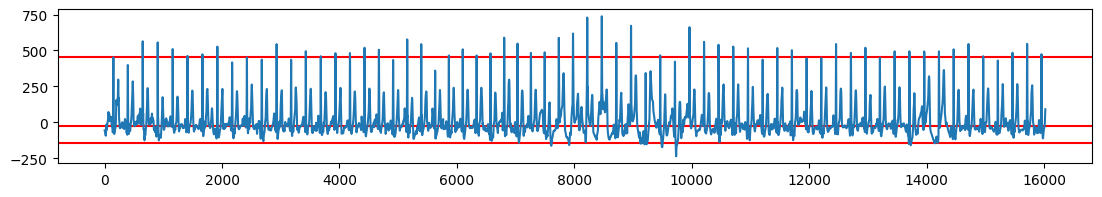

In [2]:
show_heartbeat( X_train[ 0 ])

(array([236., 537., 689., 658., 663., 732., 560., 378., 381., 283.]),
 array([0.05593607, 0.11032025, 0.16470443, 0.21908861, 0.27347278,
        0.32785696, 0.38224114, 0.43662532, 0.49100949, 0.54539367,
        0.59977785]),
 <BarContainer object of 10 artists>)

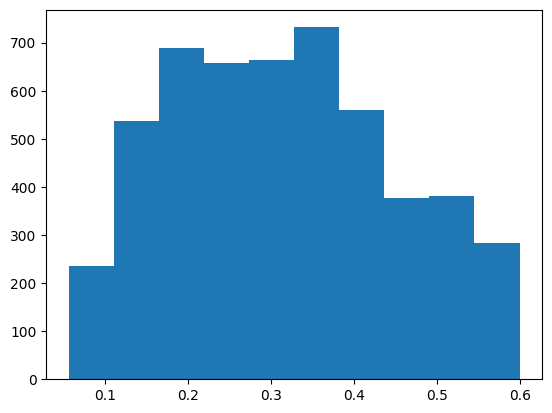

In [2]:
#testing inv stage
X = X_train

def criterion( signal ):
    
    low = np.nanquantile( signal, 0.01 )
    high = np.nanquantile( signal, 0.99 )
    mid = np.nanquantile( signal, 0.5 )
    
    return ( mid - low ) / ( high - low )

crit = np.apply_along_axis( criterion, 1, X )
order = np.argsort( crit )
X = X[ order ]
crit = crit[ order ]
plt.hist( crit )